# Star Type Classification

Classifying star type with Temperature and Absolute Magnitude

# Introduction

“Star type” is a series of categories used to classify the different types of stars that exist in this universe. There are many different This method of categorizing stars differentiates them based on their Temperature and magnitude. 
For this project we aim to successfully predict a star type according to its absolute temperature (Kelvin) and Absolute magnitude (Mv) {note: Mv= m - 2.5log[(d/10)^2]}. The question we are trying to answer is ***“can we create a classifier that can reliably classify the Star type of an unclassified star?”*** The dataset we are using is a star dataset consisting of several identifying variables for stars. For our dataset, we have:
- Absolute temperature (Kelvin)
- Relative Luminosity (L/Lo)
- Relative Radius (R/Ro)
- Absolute Magnitude (Mv)
- Star color (white, red, blue, etc.)
- Spectral class (O, B, A etc.)
## Star type 
- Brown Dwarf (star type = 0 in the data)
- Red Dwarf (star type = 1)
- White Dwarf (star type = 2)
- Main sequence (star type = 3)
- Supergiant (star type = 4)
- Hypergiant (star type = 5)


For the purpose of this classification, we will only be using **temperature**, **absolute magnitude** and **star type** columns. Unused variables will be taken out and disregarded. 




# Preliminary exploratory data analysis

- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- **Using only training data**, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- **Using only training data**, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

# Methods

We will be performing classification with K-nearest in order to look into Temperature and Radius to classify star type 

# Columns used

Temperature, Radius, Star type


# Visualization

A scatter plot with temperature on the x-axis and radius on the y-axis, with each point having a different color depending on the star type that they are.

# Expected outcomes and significance

- We are expecting to successfully find the star type (6 classes ranging from 0-5) based on Temperature (K) and Absolute Magnitude(Mv) of a single unclassified point. 

- These findings could impact users who are not familiar with stars to easily identify those star types based on these characteristics. 

- Some future questions that this could lead to are what other variables can impact the classification of star types apart from absolute temperature and magnitude? Are there any exceptions to the identification of Star types that can occur due to these other variables? How can classification help us in the Astronomy in the real-world workplace such as NASA?


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

Rows: 180
Columns: 3
$ abs_magnitude <dbl> 16.12, 16.60, 16.65, 20.06, 16.98, 17.22, 17.40, 17.45, …
$ star_type     <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ temperature   <dbl> 3068, 3042, 2800, 1939, 2840, 2637, 2600, 2650, 2700, 34…


star_type,count
<fct>,<int>
0,30
1,30
2,30
3,30
4,30
5,30


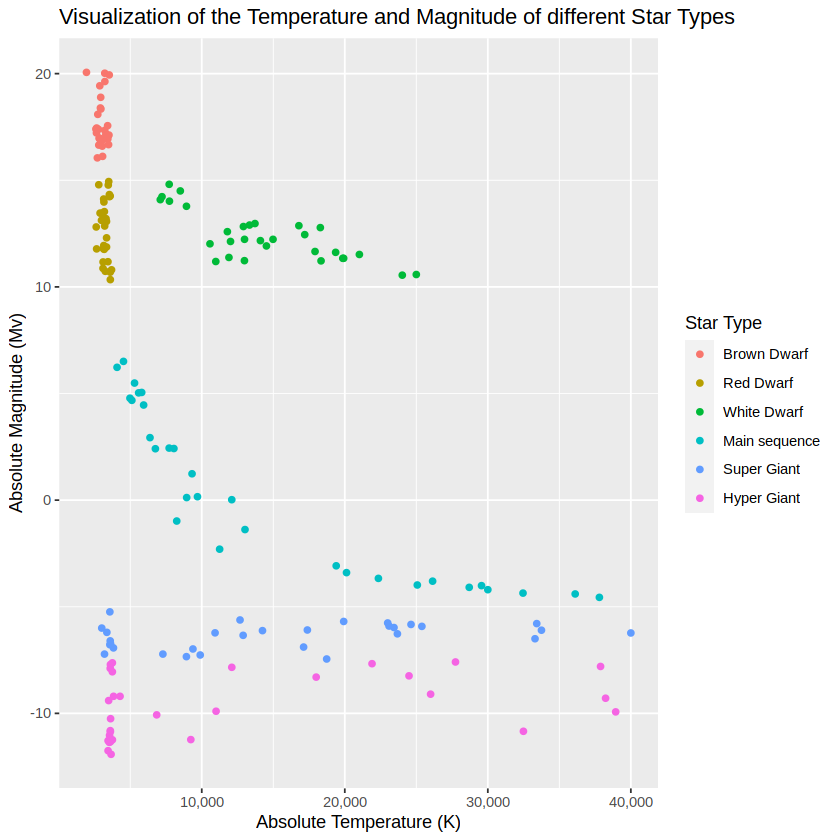

In [3]:
library(tidyverse)
library(tidymodels)
library(repr)

set.seed(777)

data<- read_csv("https://raw.githubusercontent.com/uchou92/dcsi-100-2023w1-group-28/main/6_class_csv%5B1%5D.csv", col_names=FALSE,
             skip=1)
colnames(data) <- c("temperature", "luminosity", "radius", "abs_magnitude", "star_type", "star_color", "spectral_class")

wrangled_data <- data|>
        mutate(star_type = as_factor(star_type))|>
        mutate(star_type = fct_recode(star_type, "star_type" = "star_type"))|>
        select(abs_magnitude, star_type, temperature)

data_split <- wrangled_data |>
            initial_split(prop = 0.75, strata = star_type)
data_training <- training(data_split)
data_testing <- testing(data_split)

glimpse(data_training)

count_training <- data_training |>
                    group_by(star_type) |>
                    summarize(count = n()) |>
                    arrange(desc(count))
count_training

proposal_scatter_training<- data_training|>
    ggplot(aes(x=temperature, y= abs_magnitude, color=star_type))+
            geom_point()+
            scale_color_hue(labels = c("Brown Dwarf", "Red Dwarf", "White Dwarf","Main sequence", "Super Giant", "Hyper Giant")) +
            labs(x="Absolute Temperature (K)", y= "Absolute Magnitude (Mv)", color="Star Type") +
            ggtitle("Visualization of the Temperature and Magnitude of different Star Types") +
            scale_x_continuous(labels = scales::comma_format())
                
proposal_scatter_training

In [1]:
#test